In [5]:
!pip install gym==0.24.1
!pip install pygame

  Using cached gym-0.24.1-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.21.0
    Uninstalling gym-0.21.0:
      Successfully uninstalled gym-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.5.0 requires gym==0.21, but you have gym 0.24.1 which is incompatible.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

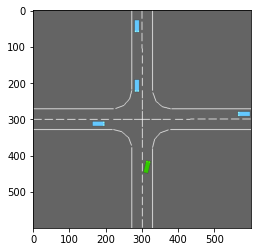

In [6]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('intersection-v0')
env.seed(0)

# env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
# env.configure({"vehicles_count": 0})  # A single other vehicle, for the sake of visualisation
# env.configure({ "screen_width": 1000, "screen_height": 400})
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()
# TODO: Check why if I put two controlled vehicles and no vehicles
# in the background still 1 controlled vehicle and 4 in the background appear

In [7]:
import pprint
pprint.pprint(env.config)

{'action': {'lateral': False,
            'longitudinal': True,
            'target_speeds': [0, 4.5, 9],
            'type': 'DiscreteMetaAction'},
 'arrived_reward': 30,
 'centering_position': [0.5, 0.5],
 'collision_reward': -100,
 'controlled_vehicles': 1,
 'destination': 'o1',
 'duration': 13,
 'hash_intersection': False,
 'high_speed_reward': 1,
 'initial_vehicle_count': 10,
 'manual_control': False,
 'normalize_reward': False,
 'observation': {'absolute': True,
                 'features': ['presence',
                              'x',
                              'y',
                              'vx',
                              'vy',
                              'cos_h',
                              'sin_h'],
                 'features_range': {'vx': [-20, 20],
                                    'vy': [-20, 20],
                                    'x': [-100, 100],
                                    'y': [-100, 100]},
                 'flatten': False,
              

In [9]:
!pip install stable-baselines3
!python -m pip uninstall pyserial --yes
!pip install protobuf==3.19.0
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


  Using cached gym-0.21.0-py3-none-any.whl
  Attempting uninstall: gym
    Found existing installation: gym 0.24.1
    Uninstalling gym-0.24.1:
      Successfully uninstalled gym-0.24.1
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [10]:

from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_3


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 5        |
|    ep_rew_mean      | 0        |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15       |
|    time_elapsed     | 1        |
|    total_timesteps  | 20       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.75     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 15       |
|    time_elapsed     | 3        |
|    total_timesteps  | 54       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.92     |
|    ep_rew_mean      | 1.17     |
|    exploration_rate | 0.955    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 17       |
|    time_elapsed     | 5        |
|    total_timesteps  | 95       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.44     |
|    ep_rew_mean      | 0.875    |
|    exploration_rate | 0.943    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 17       |
|    time_elapsed     | 6        |
|    total_timesteps  | 119      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.35     |
|    ep_rew_mean      | 0.7      |
|    exploration_rate | 0.94     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 16       |
|    time_elapsed     | 7        |
|    total_timesteps  | 127      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.42     |
|    ep_rew_mean      | 1.04     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes         | 24       |
|    fps              | 17       |
|    time_elapsed     | 8        |
|    total_timesteps  | 154      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 6.64     |
|    ep_rew_mean      | 0.893    |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 28       |
|    fps              | 16       |
|    time_elapsed     | 11       |
|    total_timesteps  | 186      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.31     |
|    ep_rew_mean      | 1.03     |
|    exploration_rate | 0.889    |
| time/               |          |
|    episodes         | 32       |
|    fps              | 16       |
|    time_elapsed     | 13       |
|    total_timesteps  | 234      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0197   |
|    n_updates        | 33       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.17     |
|    ep_rew_mean      | 1.28     |
|    exploration_rate | 0.877    |
| time/               |          |
|    episodes         | 36       |
|    fps              | 16       |
|    time_elapsed     | 15       |
|    total_timesteps  | 258      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0196   |
|    n_updates        | 57       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7        |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.867    |
| time/               |          |
|    episodes         | 40       |
|    fps              | 16       |
|    time_elapsed     | 16       |
|    total_timesteps  | 280      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0104   |
|    n_updates        | 79       |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.2      |
|    ep_rew_mean      | 1.2      |
|    exploration_rate | 0.849    |
| time/               |          |
|    episodes         | 44       |
|    fps              | 16       |
|    time_elapsed     | 18       |
|    total_timesteps  | 317      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0396   |
|    n_updates        | 116      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.27     |
|    ep_rew_mean      | 1.19     |
|    exploration_rate | 0.834    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 16       |
|    time_elapsed     | 20       |
|    total_timesteps  | 349      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.00878  |
|    n_updates        | 148      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.29     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.82     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 16       |
|    time_elapsed     | 22       |
|    total_timesteps  | 379      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0138   |
|    n_updates        | 178      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.39     |
|    ep_rew_mean      | 1.38     |
|    exploration_rate | 0.803    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 16       |
|    time_elapsed     | 24       |
|    total_timesteps  | 414      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0736   |
|    n_updates        | 213      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.37     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.79     |
| time/               |          |
|    episodes         | 60       |
|    fps              | 16       |
|    time_elapsed     | 26       |
|    total_timesteps  | 442      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0756   |
|    n_updates        | 241      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.25     |
|    ep_rew_mean      | 1.33     |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 64       |
|    fps              | 16       |
|    time_elapsed     | 27       |
|    total_timesteps  | 464      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.104    |
|    n_updates        | 263      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.24     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.766    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 16       |
|    time_elapsed     | 29       |
|    total_timesteps  | 492      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0416   |
|    n_updates        | 291      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.21     |
|    ep_rew_mean      | 1.25     |
|    exploration_rate | 0.753    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 16       |
|    time_elapsed     | 31       |
|    total_timesteps  | 519      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.157    |
|    n_updates        | 318      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.26     |
|    ep_rew_mean      | 1.29     |
|    exploration_rate | 0.738    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 16       |
|    time_elapsed     | 32       |
|    total_timesteps  | 552      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0441   |
|    n_updates        | 351      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.34     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.721    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 16       |
|    time_elapsed     | 34       |
|    total_timesteps  | 587      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0934   |
|    n_updates        | 386      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.31     |
|    ep_rew_mean      | 1.37     |
|    exploration_rate | 0.708    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 16       |
|    time_elapsed     | 36       |
|    total_timesteps  | 614      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0908   |
|    n_updates        | 413      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.3      |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.695    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 16       |
|    time_elapsed     | 37       |
|    total_timesteps  | 642      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0372   |
|    n_updates        | 441      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.26     |
|    ep_rew_mean      | 1.32     |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 16       |
|    time_elapsed     | 39       |
|    total_timesteps  | 668      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.161    |
|    n_updates        | 467      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.22     |
|    ep_rew_mean      | 1.31     |
|    exploration_rate | 0.671    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 16       |
|    time_elapsed     | 41       |
|    total_timesteps  | 693      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.118    |
|    n_updates        | 492      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.35     |
|    ep_rew_mean      | 1.35     |
|    exploration_rate | 0.651    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 16       |
|    time_elapsed     | 43       |
|    total_timesteps  | 735      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.115    |
|    n_updates        | 534      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.33     |
|    ep_rew_mean      | 1.42     |
|    exploration_rate | 0.642    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 16       |
|    time_elapsed     | 44       |
|    total_timesteps  | 753      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.132    |
|    n_updates        | 552      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.appe

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 7.38     |
|    ep_rew_mean      | 1.43     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 16       |
|    time_elapsed     | 46       |
|    total_timesteps  | 792      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0462   |
|    n_updates        | 591      |
----------------------------------


/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(data=rows, columns=self.features), ignore_index=True)
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame.from_records(
/Users/mario/Individual Code/highway-env-tibi/highway_env/envs/common/observation.py:225: FutureWarning: The frame.append method is deprecated and will be remo

KeyboardInterrupt: 

: 

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()